In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename ))

In [3]:
df_train = pd.read_csv("./twitter_training.csv")
df_val = pd.read_csv("./twitter_validation.csv")

In [4]:
df_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
df_train.info

<bound method DataFrame.info of        2401  Borderlands  Positive  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
0      I am coming to the borders and I will kill you...     
1      im getting on borderlands and i will kill you ...     
2      im coming on borderlands and i will murder you...     
3      im getting on borderlands 2 and i will murder ...     
4      im getting into borderlands and i can murder y...     
...                                                  ...     
74676  Just realized that the Windows partition of my...     
74677  Just rea

In [6]:
df_train = df_train.rename(columns={'2401': 'ID', 'Borderlands': 'platform', 'Positive': 'sentimen', 'im getting on borderlands and i will murder you all ,': 'text'})
df_val = df_val.rename(columns={'3364': 'ID', 'Facebook': 'platform', 'Irrelevant': 'sentimen', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'})

In [7]:
df_train

,ID,platform,sentimen,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
df_val

,ID,platform,sentimen,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
print(df_train["sentimen"].value_counts())
print(df_val["sentimen"].value_counts())

sentimen
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64
sentimen
Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: count, dtype: int64


In [10]:
print("Platform Counts - Training")
print(df_train["platform"].value_counts())
print(20*"==")
print("Platform Counts - Validation")
print(df_val["platform"].value_counts())

Platform Counts - Training
platform
Microsoft                            2400
MaddenNFL                            2400
TomClancysRainbowSix                 2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Overwatch                            2334
Xbox(Xseries)                        2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
CS-GO                                2304
Cyberpunk2077                        230

In [11]:
df_train = df_train.drop(["ID","platform"], axis=1)
df_val = df_val.drop(["ID","platform"], axis=1)

In [12]:
df_train

,sentimen,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [13]:
print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"DUPLICATES: {df_train.duplicated().sum()}")
print(f"missing data: {sum(df_train.isna().sum())}\n")
print("="*20)
print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"DUPLICATES: {df_val.duplicated().sum()}")
print(f"missing data: {sum(df_val.isna().sum())}")

Rows: 74681, Columns: 2
DUPLICATES: 4909
missing data: 686

Rows: 999, Columns: 2
DUPLICATES: 1
missing data: 0


In [14]:
kolom1=len(df_train.columns)
for i in range (0, kolom1):
  df_train=df_train[df_train.iloc[:,i]!='?']
  df_train=df_train[df_train.iloc[:,i]!='']
  df_train=df_train[~df_train.iloc[:,i].isna()]
df_train.info()
df_train.drop_duplicates(keep= 'first',inplace = True)

kolom=len(df_val.columns)
for i in range (0, kolom):
  df_val=df_val[df_val.iloc[:,i]!='?']
  df_val=df_val[df_val.iloc[:,i]!='']
  df_val=df_val[~df_val.iloc[:,i].isna()]
df_val.info()
df_val.drop_duplicates(keep= 'first',inplace = True)

print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")
print(f"Duplicates: {df_train.duplicated().sum()}") 
print(f"missing data: {sum(df_train.isna().sum())}")

print(20*"==")

print(f"Rows: {df_val.shape[0]}, Columns: {df_val.shape[1]}")
print(f"Duplicates: {df_val.duplicated().sum()}") 
print(f"missing data: {sum(df_val.isna().sum())}")

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  73995 non-null  object
 1   text      73995 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  999 non-null    object
 1   text      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
Rows: 69768, Columns: 2
Duplicates: 0
missing data: 0
Rows: 998, Columns: 2
Duplicates: 0
missing data: 0


In [15]:
!pip install emoji

In [16]:
import re
import string
import emoji
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Pastikan resource NLTK terunduh
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')           # kalau belum pernah diunduh
nltk.download('omw-1.4')           # opsional tapi sering diperlukan
nltk.download('punkt')             # untuk tokenisasi, jika kamu pakai word_tokenize()

# Inisialisasi
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Kamus singkatan umum (bisa diperluas)
abbreviation_map = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "btw": "by the way",
    "idk": "i do not know",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "thx": "thanks",
    "pls": "please",
    "plz": "please",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "i have",
    "ill": "i will",
    "didnt": "did not",
    "doesnt": "does not",
    "isnt": "is not",
    "wasnt": "was not",
    "havent": "have not",
    "shouldnt": "should not",
    "couldnt": "could not",
    "wouldnt": "would not",
}

def get_wordnet_pos(word):
    """
    Helper function: 
    Mengubah POS tag (part-of-speech) menjadi format yang bisa dipakai lemmatizer.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


def preprocess_text(text):
    """
    Function for text preprocessing for English sentiment analysis.
    Includes:
      - lowercase
      - emoji handling
      - URL and number removal
      - punctuation removal
      - short form expansion
      - stopword removal
      - lemmatization
    """

    # Ensure input is string
    if not isinstance(text, str):
        text = str(text)

    # Lowercase
    text = text.lower()

    # Replace emojis with text description
    text = emoji.demojize(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Expand common short forms
    words = text.split()
    expanded_words = [abbreviation_map.get(w, w) for w in words]
    text = ' '.join(expanded_words)

    # Tokenize and remove stopwords + lemmatize
    filtered_words = []
    for word in text.split():
        if word not in stop_words:
            pos = get_wordnet_pos(word)
            lemma = lemmatizer.lemmatize(word, pos)
            filtered_words.append(lemma)

    # Join cleaned text
    processed_text = ' '.join(filtered_words)

    # Clean extra whitespace
    processed_text = re.sub(r'\s+', ' ', processed_text).strip()

    return processed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data.

In [17]:
!pip install nltk

In [18]:
df_train

,sentimen,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [19]:
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_val['clean_text'] = df_val['text'].apply(preprocess_text) 

print(df_train[['text', 'clean_text']])

                                                    text  \
0      I am coming to the borders and I will kill you...   
1      im getting on borderlands and i will kill you ...   
2      im coming on borderlands and i will murder you...   
3      im getting on borderlands 2 and i will murder ...   
4      im getting into borderlands and i can murder y...   
...                                                  ...   
74676  Just realized that the Windows partition of my...   
74677  Just realized that my Mac window partition is ...   
74678  Just realized the windows partition of my Mac ...   
74679  Just realized between the windows partition of...   
74680  Just like the windows partition of my Mac is l...   

                                              clean_text  
0                                       come border kill  
1                                 im get borderland kill  
2                              im come borderland murder  
3                               im get bord

In [20]:
!pip install wordcloud

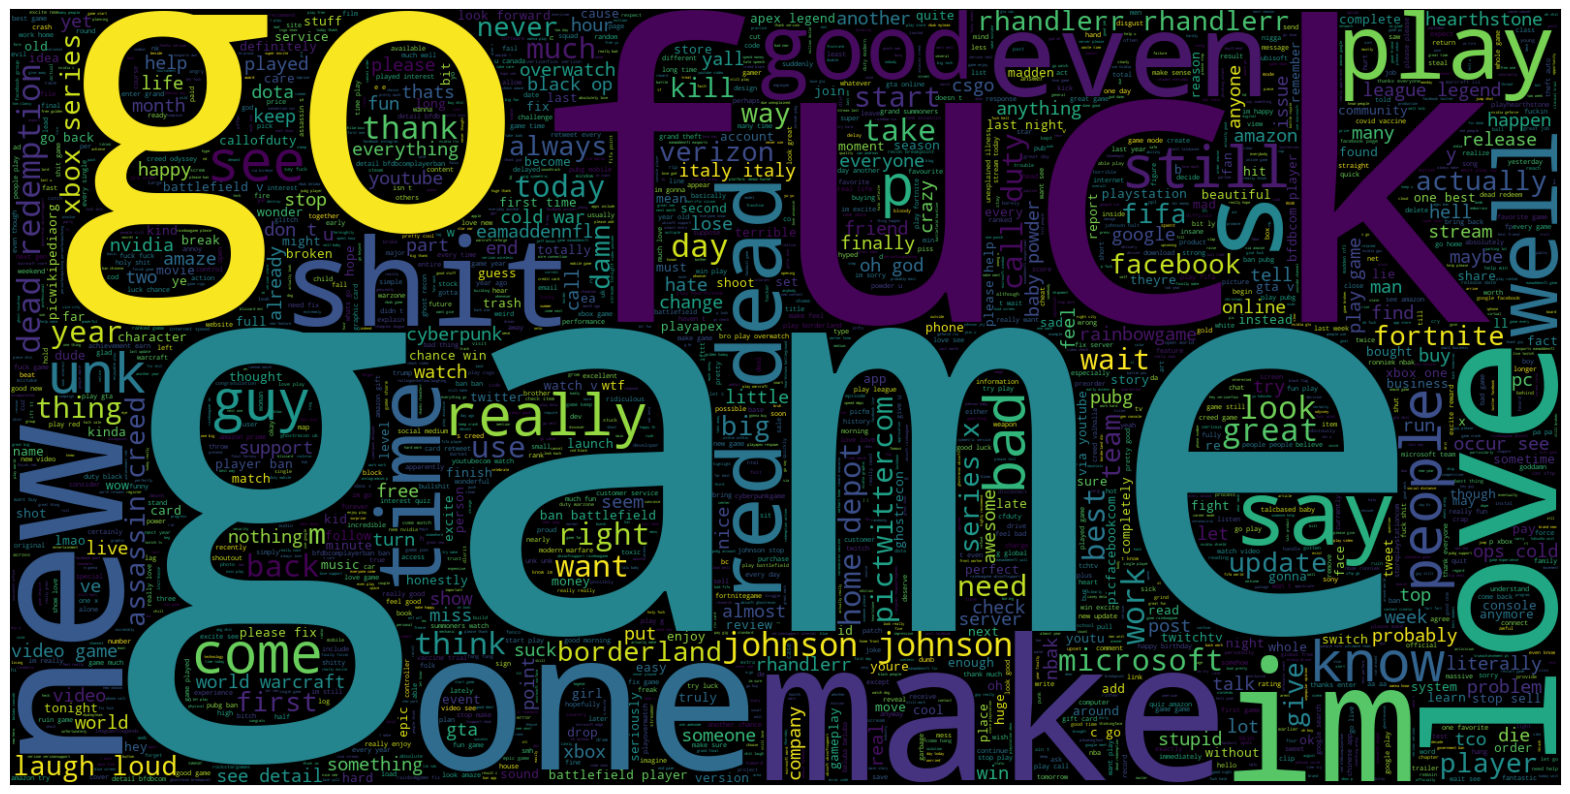

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=STOPWORDS).generate(' '.join(df_train['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.xticks([])
plt.yticks([])
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tfidf = TfidfVectorizer(max_features=1700, ngram_range=(1,2))

In [23]:
X_train = tfidf.fit_transform(df_train["clean_text"])
X_test = tfidf.transform(df_val["clean_text"])

y_train = df_train["sentimen"]
y_test = df_val["sentimen"]

In [24]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import inspect

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluasi model klasifikasi multi-class:
      - ROC & AUC (macro)
      - Akurasi
      - F1-score (macro)
      - ROC Curve Plot
    Dapat digunakan untuk SVM, Random Forest, Logistic Regression, dll.
    """

    # Prediksi label
    y_pred = model.predict(X_test)

    # Coba ambil skor probabilitas atau decision function
    if hasattr(model, "decision_function"):
        decision_scores = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        decision_scores = model.predict_proba(X_test)
    else:
        raise ValueError(f"Model {model_name} tidak mendukung ROC (butuh decision_function atau predict_proba)")

    # Binarisasi label untuk ROC multi-class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_bin.shape[1]

    # Hitung ROC curve dan AUC untuk tiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], decision_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # AUC rata-rata (macro)
    roc_auc["macro"] = roc_auc_score(y_test_bin, decision_scores, average="macro", multi_class="ovr")

    # Akurasi dan F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"======= Evaluasi Klasifikasi {model_name} =======")
    print(f"Akurasi Klasifikasi     : {accuracy * 100:.2f}%")
    print(f"F-measure (macro avg)   : {f1:.3f}")
    print(f"AUC rata-rata (macro)   : {roc_auc['macro']:.3f}")
    print("=" * 45)

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    # Garis diagonal (baseline)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return {
        "model": model_name,
        "accuracy": accuracy,
        "f1_macro": f1,
        "auc_macro": roc_auc["macro"]
    }

In [25]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.6823647294589178
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.68      0.57      0.62       171
    Negative       0.64      0.80      0.71       266
     Neutral       0.74      0.61      0.67       285
    Positive       0.69      0.72      0.70       276

    accuracy                           0.68       998
   macro avg       0.69      0.67      0.67       998
weighted avg       0.69      0.68      0.68       998



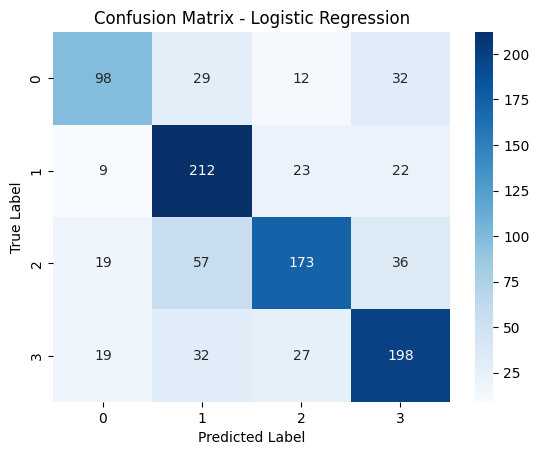

In [26]:
y_predlr = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predlr))
print("Classification Report:\n", classification_report(y_test, y_predlr))

cm = confusion_matrix(y_test, y_predlr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

======= Evaluasi Klasifikasi Logistic Regression =======
Akurasi Klasifikasi     : 68.24%
F-measure (macro avg)   : 0.675
AUC rata-rata (macro)   : 0.883


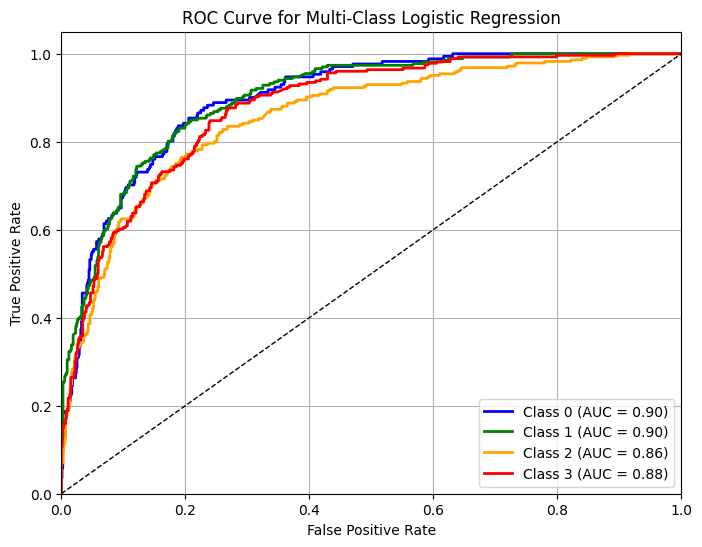

In [27]:
lr_results = evaluate_model(model, X_test, y_test, model_name="Logistic Regression")

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [29]:
train_df = pd.read_csv("twitter_training.csv")
val_df = pd.read_csv("twitter_validation.csv")

In [30]:
print("Training Data:")
print(train_df.head())

Training Data:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [31]:
train_df.columns = ['id', 'entity', 'sentiment', 'text']
val_df.columns = ['id', 'entity', 'sentiment', 'text']

In [32]:
train_df.dropna(subset=['text', 'sentiment'], inplace=True)
val_df.dropna(subset=['text', 'sentiment'], inplace=True)

In [33]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train = vectorizer.fit_transform(train_df['text'])
X_val = vectorizer.transform(val_df['text'])

y_train = train_df['sentiment']
y_val = val_df['sentiment']

In [34]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

print("\n🌳 Random Forest Results:")
print("Accuracy:", accuracy_score(y_val, rf_preds))
print(classification_report(y_val, rf_preds))


🌳 Random Forest Results:
Accuracy: 0.9369369369369369
              precision    recall  f1-score   support

  Irrelevant       0.96      0.88      0.92       171
    Negative       0.93      0.95      0.94       266
     Neutral       0.93      0.95      0.94       285
    Positive       0.94      0.94      0.94       277

    accuracy                           0.94       999
   macro avg       0.94      0.93      0.94       999
weighted avg       0.94      0.94      0.94       999



In [35]:
from IPython import get_ipython
import re

for i, cell in enumerate(get_ipython().user_ns['_ih']):
    if isinstance(cell, str):
        cleaned = re.sub(r'[^\x00-\x7F]+', ' ', cell)
        get_ipython().user_ns['_ih'][i] = cleaned

print("✅ Semua karakter non-printable berhasil dibersihkan!")


✅ Semua karakter non-printable berhasil dibersihkan!


In [36]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_val)

print("\n⚙ SVM Resultjs:")
print("Accuracy:", accuracy_score(y_val, svm_preds))
print(classification_report(y_val, svm_preds))


⚙ SVM Resultjs:
Accuracy: 0.8538538538538538
              precision    recall  f1-score   support

  Irrelevant       0.85      0.78      0.81       171
    Negative       0.84      0.93      0.88       266
     Neutral       0.90      0.81      0.85       285
    Positive       0.83      0.87      0.85       277

    accuracy                           0.85       999
   macro avg       0.85      0.85      0.85       999
weighted avg       0.86      0.85      0.85       999



In [37]:
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 310.6 kB/s eta 0:03:51
   ---------------------------------------- 0.5/72.0 MB 310.6 kB/s eta 0:03:51
   ---------------------------------------- 0.5/72.0 MB 310.6 kB/s eta 0:03:51
   ---------------------------------------- 0.5/72.0 MB 310.6 k

In [38]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode label menjadi angka (wajib untuk XGBoost)
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_val_xgb = le.transform(y_val)

# Model XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss'
)

# Train model
xgb_model.fit(X_train, y_train_xgb)

# Prediksi (hasil berupa angka)
xgb_preds_encoded = xgb_model.predict(X_val)

# Decode kembali ke label asli
xgb_preds = le.inverse_transform(xgb_preds_encoded)

print("\n✨ XGBoost Results:")
print("Accuracy:", accuracy_score(y_val, xgb_preds))
print(classification_report(y_val, xgb_preds))


✨ XGBoost Results:
Accuracy: 0.6916916916916916
              precision    recall  f1-score   support

  Irrelevant       0.84      0.51      0.64       171
    Negative       0.59      0.87      0.71       266
     Neutral       0.76      0.62      0.68       285
    Positive       0.72      0.70      0.71       277

    accuracy                           0.69       999
   macro avg       0.73      0.68      0.68       999
weighted avg       0.72      0.69      0.69       999

